## Assignments for Week-03

### 1. Re-code the titanic machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*

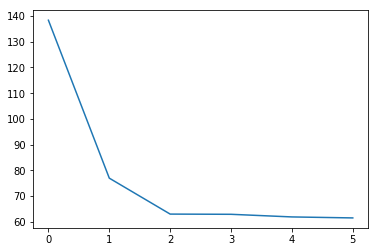

[138.37611332902367, 76.93811708967259, 62.954176719683176, 62.87428886929664, 61.85071583650258, 61.46715391964375]


In [2]:
# 1. Random Choose Method to get optimal k* and *b
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

content = pd.read_csv('/Users/xianghang/Downloads/titanic/train.csv')
content = content.dropna()
age_with_fares = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] > 130)
]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

def randomChoose(count, data):
    _randomselect = lambda : (random.random()*20-10, random.random()*20-10)
    _genFunc = lambda k,b: lambda x: k*x+b
    _calcLoss = lambda k,b: np.mean(np.abs(data['y'] - _genFunc(k,b)(data['x'])))
    
    k_init, b_init = _randomselect()
    good = k_init, b_init, float('inf')
    losses = []
    for _ in range(count):
        k, b = _randomselect()
        loss = _calcLoss(k,b)
        if loss < good[2]:
            good = k, b, loss
            losses.append(loss)
    return losses

losses = randomChoose(1000, {'x': sub_age, 'y': sub_fare})

plt.plot(range(len(losses)), losses)
plt.show()

print(losses)
    
    

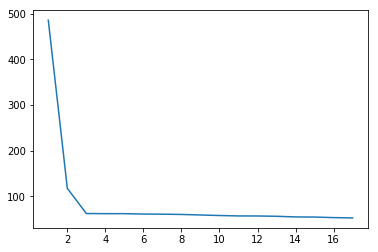

[60.31184779589635, 59.09868347675522, 57.954125335521006, 57.03396405328275, 56.94247722005889, 56.25323681626494, 54.879191250638065, 54.58515642937657, 53.36690598422138, 52.69658643233387]


In [3]:
# 2.Supervised Direction to get optimal k* and *b
def supervisedDir(count, data, step):
    _randomselect = lambda : (random.random()*20-10, random.random()*20-10)
    _genFunc = lambda k,b: lambda x: k*x+b
    _calcLoss = lambda k,b: np.mean(np.abs(data['y'] - _genFunc(k,b)(data['x'])))
    _genOnDir = lambda best_dir: (random.random()*best_dir[0]*step, random.random()*best_dir[1]*step)
    _getBestDir = lambda r: ([(1,1),(1,-1),(-1,-1),(-1,1)][r.index(min(res))], min(r))
    _randomDir = lambda : random.choice([(1,1),(1,-1),(-1,-1),(-1,1)])
    
    good_k, good_b = _randomselect()
    losses = [float('inf')]
    good_dir = _randomDir()
    for _ in range(count):
        # new k,b
        dk, db = _genOnDir(good_dir)
        k, b = good_k+dk, good_b+db
        loss = _calcLoss(k,b)
        
        if loss < losses[-1]:
            losses.append(loss)
            good_k, good_b = k, b
        else:
            good_dir = _randomDir()
        
    return losses
        
losses = supervisedDir(1000, {'x': sub_age, 'y': sub_fare}, 10)
plt.plot(range(len(losses)), losses)
plt.show()
print(losses[-10:])

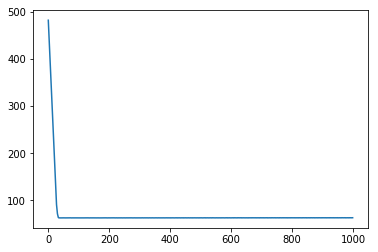

[63.202318076823374, 63.087146586399946, 63.16724882474582, 63.119224148726815, 63.13217957266824, 63.15130171105369, 63.097110320590694, 63.18337927338056, 63.06204106851314, 63.215456835707435]


In [4]:
# 3.Gradient Descent to get optimal k* and *b
def gradDesc(count, data, lear_rate):
    derivate_k = lambda y, eta_y, x: np.mean([-xi*1 if yi - eta_yi > 0 else -xi*-1
                                                 for yi, eta_yi, xi in zip(y, eta_y, x)])
    derivate_b = lambda y, eta_y: np.mean([1 if yi - eta_yi > 0 else -1 
                                               for yi, eta_yi in zip(y, eta_y)])
    randomkb = lambda : (random.random()*20-10, random.random()*20-10)
    genFunc = lambda k,b: lambda x: k*x+b
    calcLoss = lambda k,b: np.mean(np.abs(data['y'] - genFunc(k,b)(data['x'])))
    
    losses = []
    k, b = randomkb()
    for _ in range(count):
        _func = genFunc(k,b)
        eta_y = _func(data['x'])
        
        dk = derivate_k(data['y'], eta_y, data['x'])
        db = derivate_b(data['y'], eta_y)
        k, b = k - dk * lear_rate, b - db * lear_rate
        losses.append(calcLoss(k, b))
        
    return losses
        
losses = gradDesc(1000, {'x': sub_age, 'y': sub_fare}, 1e-2)
plt.plot(range(len(losses)), losses)
plt.show()
print(losses[-10:])

## 2. Answer following questions:


###### 1. Why we need machine learning methods instead of creating a complicated formula?


Ans: machine learning is more flexible

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: without supervisor, the answer will be very unstable，and we cannot tell the answer is what we want.

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:   
yes its beeter than 1st one.   
after each move, the algorithm still need to look around if the direction is not good enough, its a waste.

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:   
Derivative will be more precisely to show which direction is "correct", hence we can just move forward rather than looking round.

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:   
Gradient shows the derivative of loss function,   
Descent shows we always go to the direction which makes loss smaller, and how big step in each move.

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:   
1. no random move, which saves a lot of calculations   
2. we "always" know which direction is correct   
3. fast convergence

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:   
me, data, learn

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-April-20

>Submit: Submit the source code and result to github. 



#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package requests page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is get station information of all the subway lines;

> e.	You may need install @package beautiful soup  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> a.	Build the search agent based on the graph we build.

> b.	As much as you can to use the already implemented search agent. You just need to define the is_goal, get_successor, strategy three functions. 


##### 4.	Create different policies for transfer system.

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因
